In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib
import matplotlib.dates as mdates

%matplotlib inline

pylab.rcParams['font.family'] = 'serif' 
pylab.rcParams['font.size'] = 14
pylab.rcParams['axes.titlesize'] = 22

def prettify_plot(): 
    ""'Hides top and rightmos axis spines and also some other stuff. '""
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_axis_bgcolor('none')
    plt.grid(b=False, which='major')

In [123]:
# scp WIN\\ascott47@wha.eps.jhu.edu:/var/lib/weewx/olinhall-weewx.sdb .
import sqlite3
conn = sqlite3.connect('olinhall-weewx.sdb')
olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
olinhalldf = olinhalldf.set_index('dateTime')
olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

w_x = pd.read_csv('WeatherCube_test0.csv', 
                      sep = ',', 
                      parse_dates = {'Date':[0]},
                      #parse_dates = ['YYYYMMDD', 'HHM'],
                      keep_date_col=True).set_index('Date')
w_x.sensor0_10 = w_x.sensor0_10*.1
w_x.sensor0_16 = w_x.sensor0_16*.1
w_x.sensor1 = w_x.sensor1*.1

In [8]:
startDate = '2016-03-28'
endDate = '2016-03-30'

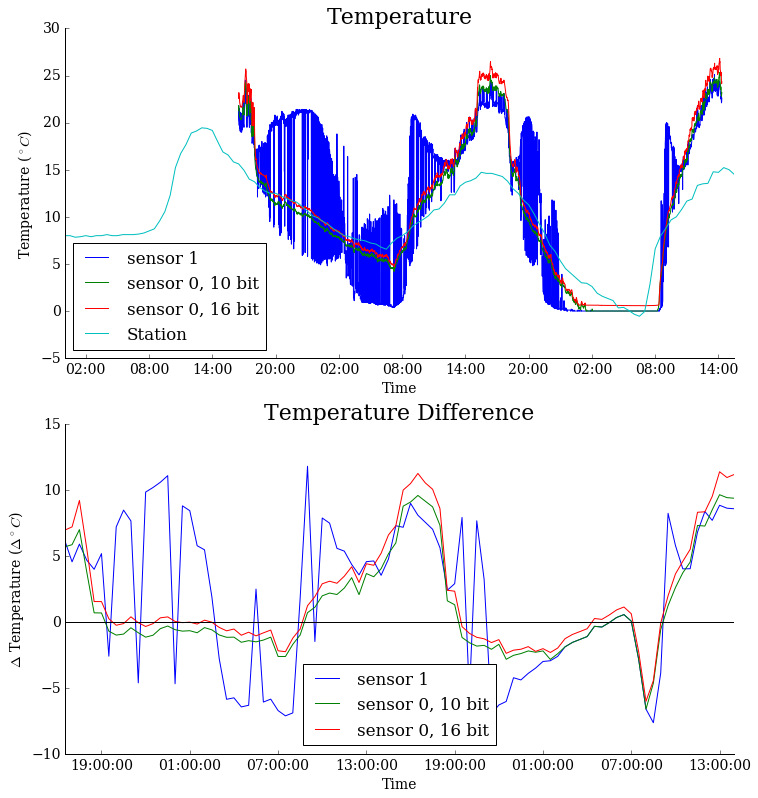

In [127]:
figure = plt.figure(figsize=[12,13])
ax = figure.add_subplot(211)
plt.plot(w_x.index, w_x.sensor1, label = 'sensor 1')
plt.plot(w_x.index, w_x.sensor0_10, label = 'sensor 0, 10 bit')
plt.plot(w_x.index, w_x.sensor0_16, label = 'sensor 0, 16 bit')
plt.plot(olinhalldf[startDate:endDate].index, olinhalldf.outTemp[startDate:endDate], label = 'Station')
plt.legend(loc='best')
ax = figure.canvas.figure.get_axes()[0]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
prettify_plot()
plt.title('Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature ($^\circ C$)')

ax.figure.add_subplot(212)
commonTime = olinhalldf[w_x.index[0]:w_x.index[-2]].index
plt.plot(commonTime, w_x.sensor1.resample('30T', how = 'first') - olinhalldf.outTemp[w_x.index[0]:w_x.index[-2]], 
         label = 'sensor 1')

plt.plot(commonTime, w_x.sensor0_10.resample('30T', how = 'first') - olinhalldf.outTemp[w_x.index[0]:w_x.index[-2]], 
         label = 'sensor 0, 10 bit')

plt.plot(commonTime, w_x.sensor0_16.resample('30T', how = 'first') - olinhalldf.outTemp[w_x.index[0]:w_x.index[-2]], 
         label = 'sensor 0, 16 bit')

plt.axhline(0, color = 'black')
plt.legend(loc='best')
ax = figure.canvas.figure.get_axes()[0]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
prettify_plot()
plt.title('Temperature Difference')
plt.xlabel('Time')
plt.ylabel('$\Delta $ Temperature ($\Delta ^\circ C$)')

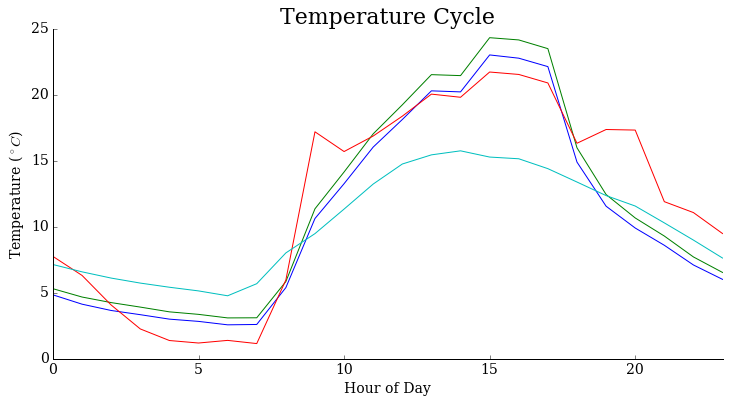

In [141]:
figure = plt.figure(figsize=[12,13])
ax = figure.add_subplot(211)

w_x.sensor0_10.groupby(w_x.index.hour).mean().plot()
w_x.sensor0_16.groupby(w_x.index.hour).mean().plot()
w_x.sensor1.groupby(w_x.index.hour).mean().plot()
olinhalldf[startDate:endDate].outTemp.groupby(olinhalldf[startDate:endDate].index.hour).mean().plot()
prettify_plot()
plt.title('Temperature Cycle')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature ($^\circ C$)')


In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3
conn = sqlite3.connect('../olinhall-weewx.sdb')
olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
olinhalldf = olinhalldf.set_index('dateTime')
olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

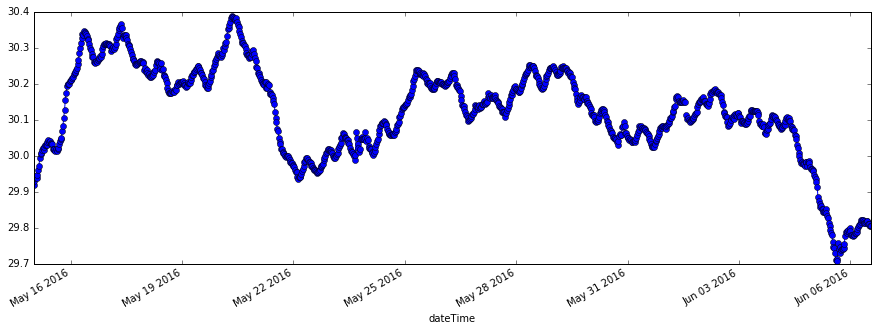

In [17]:
olinhalldf['barometer']['2016-05-15':].plot(style = '-o', figsize=[15,5])

In [19]:
olinhalldf['2016-06-06']['barometer'], olinhalldf['barometer'].min()

(dateTime
 2016-06-06 00:00:00    29.790
 2016-06-06 00:30:00    29.779
 2016-06-06 01:00:00    29.779
 2016-06-06 01:30:00    29.776
 2016-06-06 02:00:00    29.778
 2016-06-06 02:30:00    29.779
 2016-06-06 03:00:00    29.784
 2016-06-06 03:30:00    29.784
 2016-06-06 04:00:00    29.789
 2016-06-06 04:30:00    29.796
 2016-06-06 05:00:00    29.802
 2016-06-06 05:30:00    29.808
 2016-06-06 06:00:00    29.811
 2016-06-06 06:30:00    29.815
 2016-06-06 07:00:00    29.822
 2016-06-06 07:30:00    29.822
 2016-06-06 08:00:00    29.821
 2016-06-06 08:30:00    29.819
 2016-06-06 09:00:00    29.812
 2016-06-06 09:30:00    29.814
 2016-06-06 10:00:00    29.816
 2016-06-06 10:30:00    29.819
 2016-06-06 11:00:00    29.819
 2016-06-06 11:30:00    29.811
 2016-06-06 12:00:00    29.811
 2016-06-06 12:30:00    29.805
 2016-06-06 13:00:00    29.805
 Name: barometer, dtype: float64, 29.376999999999999)

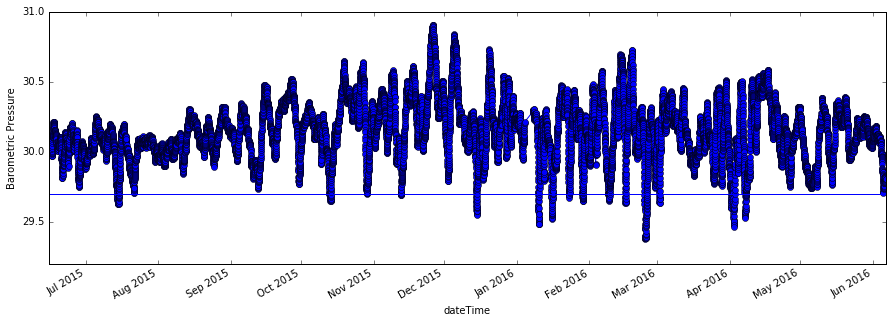

In [28]:
olinhalldf['barometer'].plot(style = '-o', figsize=[15,5])
plt.axhline(29.7)
plt.ylabel('Barometric Pressure')